# IE 529 Computational Assignment 1

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

%matplotlib inline

## Part 1. Regression Analysis

In [2]:
# load the data set
data1 = pd.read_csv('./data/Comp1_IE529_data1.csv', header=None).values
x = data1[:, 0]
y = data1[:, 1]

### Polynomial Regression

In [3]:
def polynomial_regression(x, y, degree, x_range):
    """ function to perform polynomial regression and compute least suares error
        
        Parameters:
        -----------
        x: input array, should have one dimension 
        y: fit goal, shoule have one dimension
        degree: polynomial degress
        
        return:
        -------
        w: weight matrix, the first value is intercept
        prediction: predicted values
        error: least squares error
    """
    
    n = len(x)
    # map x into multiple columns
    X = np.zeros((n, degree + 1))
    X[:, 0] = 1
    for i in range(1, degree + 1):
        X[:, i] = x ** i
    
    # reshape y into n by 1 format
    Y = np.array([y]).T
    
    # compute w, prediction and error
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
    error = np.sum((np.dot(X, w) - Y) ** 2)
    
    # compute the prediction
    new_X = np.zeros((len(x_range), degree + 1))
    new_X[:, 0] = 1
    for i in range(1, degree + 1):
        new_X[:, i] = x_range ** i
    prediction = np.dot(new_X, w)
    
    return w, error, prediction


def visualize_fitting(x, y, x_range, prediction, degree, error):
    """ function to visualize the fitted result """
    
    fig, ax = plt.subplots()
    ax.plot(x, y, 'g.', label='Original y')
    ax.plot(x_range, prediction, 'r-', label='Predicted y')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Polynomial Regression with degree ' + str(degree) + ' (RSS= ' + str(round(error)) + ')')
    ax.legend(loc='best')
    ax.grid('on')
    
    return fig

In [4]:
# fit the polynomial regression model with different degrees
degree_list = [1, 2, 3, 4, 5, 6, 7, 8]
x_range = np.linspace(20, 160, 100)
w_list = []
error_list = []
predict_list = []

for i in degree_list:
    w, error, prediction = polynomial_regression(x, y, degree=i, x_range=x_range)
    w_list.append(w)
    error_list.append(error)
    predict_list.append(prediction)

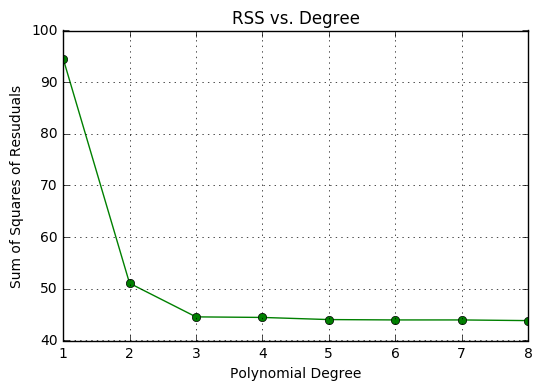

In [5]:
# plot the error change
fig, ax = plt.subplots()
ax.plot(degree_list, error_list, 'go-')
ax.set_xlabel('Polynomial Degree')
ax.set_ylabel('Sum of Squares of Resuduals')
ax.set_title('RSS vs. Degree')
ax.grid('on')
fig.savefig('./result/rss.pdf')
fig.savefig('./result/rss.png', dpi=300)
plt.show()

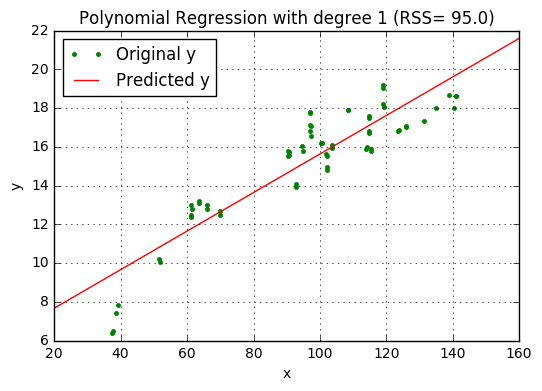

In [6]:
# linear regression
degree = 1
fig = visualize_fitting(x, y, x_range, predict_list[degree-1], 
                        degree=degree, error=error_list[degree-1])
fig.savefig('./result/poly_1.pdf')
fig.savefig('./result/poly_1.png', dpi=300)

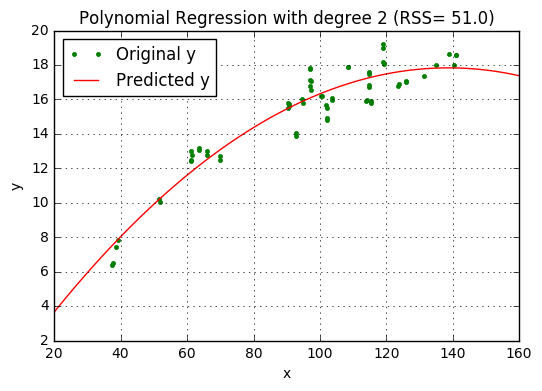

In [7]:
# Polynomial regression with degree 2
degree = 2
fig = visualize_fitting(x, y, x_range, predict_list[degree-1], 
                        degree=degree, error=error_list[degree-1])
fig.savefig('./result/poly_2.pdf')
fig.savefig('./result/poly_2.png', dpi=300)

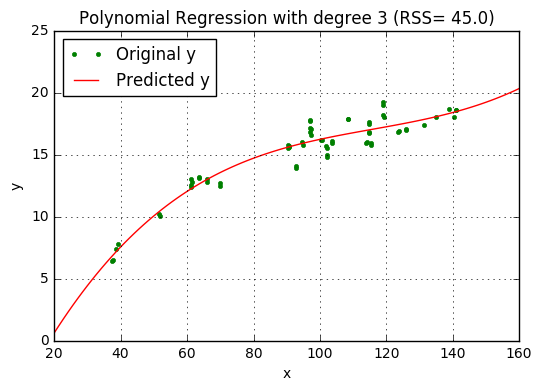

In [8]:
# Polynomial regression with degree 3
degree = 3
fig = visualize_fitting(x, y, x_range, predict_list[degree-1], 
                        degree=degree, error=error_list[degree-1])
fig.savefig('./result/poly_3.pdf')
fig.savefig('./result/poly_3.png', dpi=300)

# Part 2. Principal Component Analysis

In [9]:
# load the data set
data2 = pd.read_csv('./data/flowers.csv', header=None).values

In [10]:
def PCA(x, whiten=False):
    """ function for Principal Component Analysis 
        
        x: shoule have the form of sample by feature
        whiten: if whiten = True, will standardized the input data
    """
    n, m = x.shape
    
    # de-mean the data
    x = x - np.mean(x, axis=0)
    if whiten == True:
        std = np.std(x, axis=0)
        x = x / std
    
    # compute the covariance matrix
    cov = np.dot(x.T, x) / (n - 1)
    
    # SVD
    u, s, v = np.linalg.svd(cov)
    ratio = s / np.sum(s)
    
    # project x onto the computed components
    projection = np.dot(x, u)
    
    return u, s, ratio, projection

## Non-Standarized Version

In [11]:
u, s, ratio, projection = PCA(data2, whiten=False)
print('Eigenvectors: \n', u)
print('\nVariance\n', s)
print('\nVariance Ration\n', ratio)

Eigenvectors: 
 [[-0.36158968 -0.65653988  0.58099728  0.31725455]
 [ 0.08226889 -0.72971237 -0.59641809 -0.32409435]
 [-0.85657211  0.1757674  -0.07252408 -0.47971899]
 [-0.35884393  0.07470647 -0.54906091  0.75112056]]

Variance
 [ 4.22484077  0.24224357  0.07852391  0.02368303]

Variance Ration
 [ 0.92461621  0.05301557  0.01718514  0.00518309]


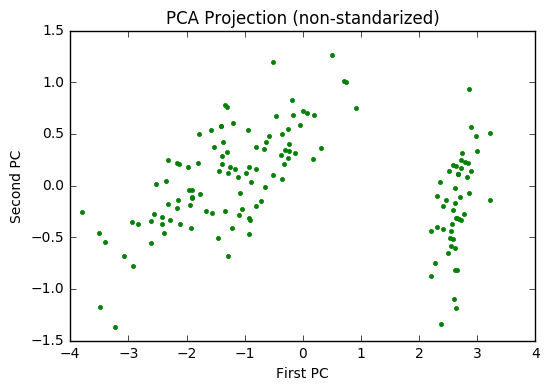

In [12]:
# plot the first two components
fig, ax = plt.subplots()
ax.plot(projection[:, 0], projection[:, 1], 'g.')
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_title('PCA Projection (non-standarized)')
fig.savefig('./result/projection1.pdf')
fig.savefig('./result/projection1.png', dpi=300)

plt.show()

## Standarized Version

In [13]:
u, s, ratio, projection = PCA(data2, whiten=True)
print('Eigenvectors: \n', u)
print('\nVariance\n', s)
print('\nVariance Ration\n', ratio)

Eigenvectors: 
 [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]

Variance
 [ 2.93035378  0.92740362  0.14834223  0.02074601]

Variance Ration
 [ 0.72770452  0.23030523  0.03683832  0.00515193]


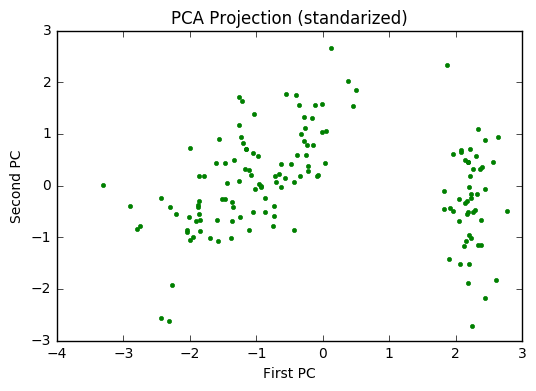

In [14]:
# plot the first two components
fig, ax = plt.subplots()
ax.plot(projection[:, 0], projection[:, 1], 'g.')
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_title('PCA Projection (standarized)')
fig.savefig('./result/projection2.pdf')
fig.savefig('./result/projection2.png', dpi=300)

plt.show()